In [0]:
-------------------------------------------------------------------------------
-- Federal University of Santa Maria
-- Technology Center
-- Computer Engineering Course
--
-- Author : Luis Felipe de Deus
--
-- Created : 28 May 2020
-- Update : 28 May 2020
-------------------------------------------------------------------------------

####### JUST A SMALL IMPLEMENTATION OF ARTIFICIAL NEURAL NETWORK

####### USING KERAS CONV NET

# Get Data

[_dataset_ MNIST](https://en.wikipedia.org/wiki/MNIST_database) from [website](http://yann.lecun.com/exdb/mnist/) of [Prof. Yann LeCun](https://en.wikipedia.org/wiki/Yann_LeCun).

In [2]:
# Imagens de treinamento
!wget http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz -O train-images-idx3-ubyte.gz
# Rótulos (classes)
!wget http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz -O train-labels-idx1-ubyte.gz
# Imagens de validação
!wget http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz -O t10k-images-idx3-ubyte.gz
# Rótulos de validação (classes)
!wget http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz -O t10k-labels-idx1-ubyte.gz

--2020-06-04 21:38:23--  http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 104.28.6.204, 172.67.171.76, 104.28.7.204, ...
Connecting to yann.lecun.com (yann.lecun.com)|104.28.6.204|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9912422 (9.5M) [application/x-gzip]
Saving to: ‘train-images-idx3-ubyte.gz’

train-images-idx3-u 100%[===================>]   9.45M  13.5MB/s    in 0.7s    

2020-06-04 21:38:24 (13.5 MB/s) - ‘train-images-idx3-ubyte.gz’ saved [9912422/9912422]

--2020-06-04 21:38:26--  http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 104.28.6.204, 172.67.171.76, 104.28.7.204, ...
Connecting to yann.lecun.com (yann.lecun.com)|104.28.6.204|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28881 (28K) [application/x-gzip]
Saving to: ‘train-labels-idx1-ubyte.gz’

train-labels-idx1-u 100%[===================>]  28.20K  --.-KB

In [0]:
#Import the Libraries we need
import numpy as np
from struct import unpack
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from math import sqrt
import matplotlib.pyplot as plt
import tensorflow.compat.v2 as tf

In [0]:
# Unpack files
!gunzip *.gz

In [0]:
#@brief: This function will read the file and create an 3d array
#@param: img_filename is the filename from the desired file
#@param: 3d array with the images
def read_imgs(img_filename):
  
  # Open the file
  img_file = open(img_filename,'rb')

  # Read the file head
  magic = unpack('>i', img_file.read(4))[0]
  total = unpack('>i', img_file.read(4))[0]
  height = unpack('>i', img_file.read(4))[0]
  width = unpack('>i', img_file.read(4))[0]

  #Validation test against corrupted files
  if magic != 2051:
    print('Erro, este arquivo não parece ser um arquivo de imagens MNIST')

  #3d array with the sample (image) where the image is 28*28 pixels
  imgs = np.zeros((total,height,width))

  #Populates the array
  for k in range(total): # Each sample k
    for i in range(height): # Each line i
      for j in range(width): # Each column j
        imgs[k,i,j] = ord(img_file.read(1)) # 1 byte
  
  # Return the 3darray
  return imgs

In [0]:
#@brief: This function will read the labels and create an 2d array
#@param: labels_filename is the filename from the desired file
#@param: 2d array with the images
def read_labels(labels_filename):
  
  # Open the file
  labels_file = open(labels_filename,'rb')

  # Read the file head
  magic = unpack('>i', labels_file.read(4))[0]
  total = unpack('>i', labels_file.read(4))[0]

  #Validation test against corrupted files
  if magic != 2049:
    print('Erro, este arquivo não parece ser um arquivo de imagens MNIST')

  #2d array with the sample (label)
  labels = np.zeros((total))

  #Populates the array
  for k in range(total): # Each sample k
    labels[k] = ord(labels_file.read(1)) #  1 byte
  
  # Return the 3darray
  return labels

In [0]:
# Read training data
imgs = read_imgs('train-images-idx3-ubyte')
labels = read_labels('train-labels-idx1-ubyte')

# Read validation data
imgs_val = read_imgs('t10k-images-idx3-ubyte')
labels_val = read_labels('t10k-labels-idx1-ubyte')

Normalizing

In [0]:
# Normalize the images
X_train = imgs / 255.0
X_test = imgs_val / 255.0

In [0]:
# One-hot encoding of labels
Y_train = tf.keras.utils.to_categorical(labels)
Y_test = tf.keras.utils.to_categorical(labels_val)

In [19]:
X_train.shape

(60000, 28, 28)

In [0]:
# Reshape the input to feed the neural network properly
# 1:samples, 2:line, 3:columns, 4:channels
#In this case the images are monocromatic, so 1-d we have to add this dimension
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [0]:
p = tf.keras.models.Sequential([
      # 1 Convolution layer
      tf.keras.layers.Conv2D(32, (3, 3), activation='relu',
                             input_shape=(28, 28, 1)),
      # 2 Convolution layer
      tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
      # 3 Max Pooling Layer
      tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
      # Dropout
      tf.keras.layers.Dropout(0.25),
      # Serialize with flatten
      tf.keras.layers.Flatten(),
      # Hidden layer with 128 neurons
      tf.keras.layers.Dense(128, activation='relu'),
      # Dropout
      tf.keras.layers.Dropout(0.25),
      # Output layer with softmax
      tf.keras.layers.Dense(10, activation='softmax')
    ])

In [22]:
#Summarize the neural network
p.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)              

In [0]:
#Compile the Neural Network
p.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=['accuracy'],
)

In [25]:
# Trainig the neural network
h = p.fit(X_train, Y_train, \
         batch_size=32, epochs=10, \
         validation_data=(X_test, Y_test),
         shuffle=True)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0505 - accuracy: 0.9844 - val_loss: 0.0336 - val_accuracy: 0.9887
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0383 - accuracy: 0.9879 - val_loss: 0.0389 - val_accuracy: 0.9877
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0304 - accuracy: 0.9900 - val_loss: 0.0372 - val_accuracy: 0.9879
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0254 - accuracy: 0.9921 - val_loss: 0.0288 - val_accuracy: 0.9911
Epoch 5/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0193 - accuracy: 0.9937 - val_loss: 0.0343 - val_accuracy: 0.9908
Epoch 6/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0170 - accuracy: 0.9944 - val_loss: 0.0293 - val_accuracy: 0.9917
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0153 - accuracy: 0.9949 - val_loss: 0.0328 - val_accuracy:

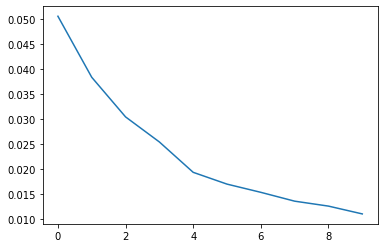

In [26]:
#Plot learning curve
plt.plot(h.history['loss'])
plt.show()

In [28]:
#Evaluate the neural network
#First using training data
loss, accuracy = p.evaluate(X_train, Y_train, verbose=0)
print('Accuracy on training data:', 100*accuracy, '%')

#Second using test data
loss, accuracy = p.evaluate(X_test, Y_test, verbose=0)
print('Accuracy on test data:', 100*accuracy, '%')

Accuracy on training data: 99.94833469390869 %
Accuracy on test data: 99.19999837875366 %
